In [2]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

2025-02-04 16:45:17.045778: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-04 16:45:17.227779: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-04 16:45:17.479942: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738676717.869882    4507 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738676718.005621    4507 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 16:45:18.743966: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std


# Важно!!!
# Величины, используемые для нормализации берутся
# только из обучающих данных и ниоткуда больше

In [13]:
import keras
import numpy as np
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

    return model

In [19]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 130
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i*num_val_samples: (i + 1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i + 1)*num_val_samples]

    partial_train_data = np.concatenate([
        train_data[:i*num_val_samples],
        train_data[(i + 1) * num_val_samples:]
    ], axis=0)

    partial_train_targets = np.concatenate([
        train_targets[:i*num_val_samples],
        train_targets[(i + 1) * num_val_samples:]
    ], axis=0)

    model = build_model()
    history = model.fit(
        partial_train_data,
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,
        batch_size=16,
        verbose=0 # обцчение в режиме без сообщений
    )
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


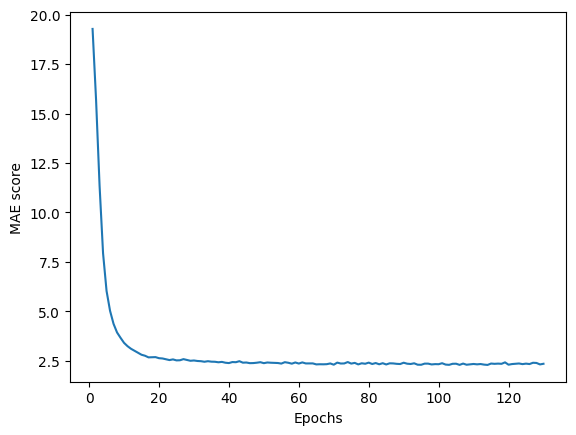

In [20]:
import matplotlib.pyplot as plt

averege_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(averege_mae_history) + 1), averege_mae_history)
plt.xlabel("Epochs")
plt.ylabel("MAE score")
plt.show()